# Generating data sets

In [1]:
import cv2


In [2]:
def generate_dataset():
    face_classifier=cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
    def face_cropped(img):
        gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        faces=face_classifier.detectMultiScale(gray,1.3,5)
        
        if faces is ():
            return None
        for (x,y,w,h) in faces:
            cropped_face=img[y:y+h,x:x+w]
        return cropped_face
            
    cap=cv2.VideoCapture(0)
    img_id=20
    
    
    while True:
        ret, frame=cap.read()
        if face_cropped(frame) is not None:
            img_id +=1
            face=cv2.resize(face_cropped(frame),(200,200))
            face=cv2.cvtColor(face,cv2.COLOR_BGR2GRAY)
            #file_name_path="data/"+"Yusuf."+str(img_id)+".jpg"
            file_name_path="Image for visualization/"+str(img_id)+".jpg"
            cv2.imwrite(file_name_path,face)
            cv2.putText(face,str(img_id),(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
            
            
            cv2.imshow("Cropped_Face", face)
            if cv2.waitKey(1)==13 or int(img_id)==40:#13 is the ASCI charater of enter jasle chahi infinite loopma cameralai lana baat rokxa
                break
    cap.release()
    cv2.destroyAllWindows()
    
    print("Collecting samples is completed")
                
#generate_dataset()

<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\user\AppData\Local\Temp\ipykernel_1396\1670198544.py:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


In [3]:

import numpy as np

In [4]:
def my_label(image_name):
    name=image_name.split('.')[-3]
    #if i have two person in my dataset
    #if name=="Sushma":
        #return np.array([1,0])
    #elif name=="Shreeyukta":
       # return np.array([0,1])
    
    #if i have three persons in my dataset
    if name=="Sushma":
        return np.array([0,1,0,0])
    elif name=="Yusuf":
        return np.array([0,0,1,0])
    elif name=="Shirjana":
        return np.array([0,0,0,1])
    elif name=="Santosh":
        return np.array([1,0,0,0])

#Create data

In [5]:
import os
from random import shuffle
from tqdm import tqdm
import numpy as np
import cv2

In [6]:
def my_data():
    data=[]
    for img in tqdm(os.listdir("data")):
        path=os.path.join("data",img)
        img_data=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img_data=cv2.resize(img_data,(50,50))
        data.append([np.array(img_data),my_label(img)])
    shuffle(data)
    return data

In [7]:
data=my_data()

100%|█████████████████████████████████████████████████████████████████████████████| 4000/4000 [00:10<00:00, 378.05it/s]


In [8]:
train=data[:3400] 
test=data[3400:]
X_train=np.array([i[0] for i in train]).reshape(-1,50,50,1)
print(X_train.shape)
y_train =[i[1] for i in train]
X_test=np.array([i[0] for i in test]).reshape(-1,50,50,1)
print(X_test.shape)
y_test=[i[1] for i in test]

(3400, 50, 50, 1)
(600, 50, 50, 1)


# Creating the model

In [9]:
#import warnings
#warnings.filterwarning('ignore')

import random

import tensorflow.compat.v1 as tf

import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
import numpy as np


Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [10]:
import numpy as np
tf.reset_default_graph()
convnet= input_data(shape=[50,50,1])
convnet=conv_2d(convnet, 32, 5, activation='relu')
#32 filters and stride=5 so that the filter will move 5 pixel or unit at time
convnet=max_pool_2d(convnet, 5)
convnet=conv_2d(convnet, 64, 5, activation='relu')
convnet=max_pool_2d(convnet, 5)
convnet=conv_2d(convnet, 128, 5, activation='relu')
convnet=max_pool_2d(convnet, 5)
convnet=conv_2d(convnet, 64, 5, activation='relu')
convnet=max_pool_2d(convnet, 5)
convnet=conv_2d(convnet, 32, 5, activation='relu')
convnet=max_pool_2d(convnet, 5)



convnet=fully_connected(convnet, 1024, activation='relu')
convnet=dropout(convnet, 0.8)
convnet=fully_connected(convnet, 4, activation='softmax') # output layer
convnet=regression(convnet, optimizer='adam', learning_rate=0.001, loss='categorical_crossentropy')
model=tflearn.DNN(convnet, tensorboard_verbose=1)
model.fit(X_train, y_train, n_epoch=50, validation_set=(X_test, y_test), show_metric=True, run_id='FRS')


Training Step: 2699  | total loss: 0.00016 | time: 7.923s
| Adam | epoch: 050 | loss: 0.00016 - acc: 1.0000 -- iter: 3392/3400
Training Step: 2700  | total loss: 0.00014 | time: 9.090s
| Adam | epoch: 050 | loss: 0.00014 - acc: 1.0000 | val_loss: 0.00002 - val_acc: 1.0000 -- iter: 3400/3400
--


# train the classifier or prediction the data

In [11]:
from tqdm import tqdm
import os
import numpy as np

In [12]:

def data_for_visualization():
    Vdata=[]
    for img in tqdm(os.listdir("Image for visualization")):
        path=os.path.join("Image for visualization", img)
        img_num=img.split('.')[0]
        img_data=cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img_data=cv2.resize(img_data, (50,50))
        Vdata.append([np.array(img_data), img_num])
    shuffle(Vdata)
    return Vdata

In [13]:
Vdata=data_for_visualization()

100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 215.36it/s]


ValueError: num must be 1 <= num <= 25, not 26

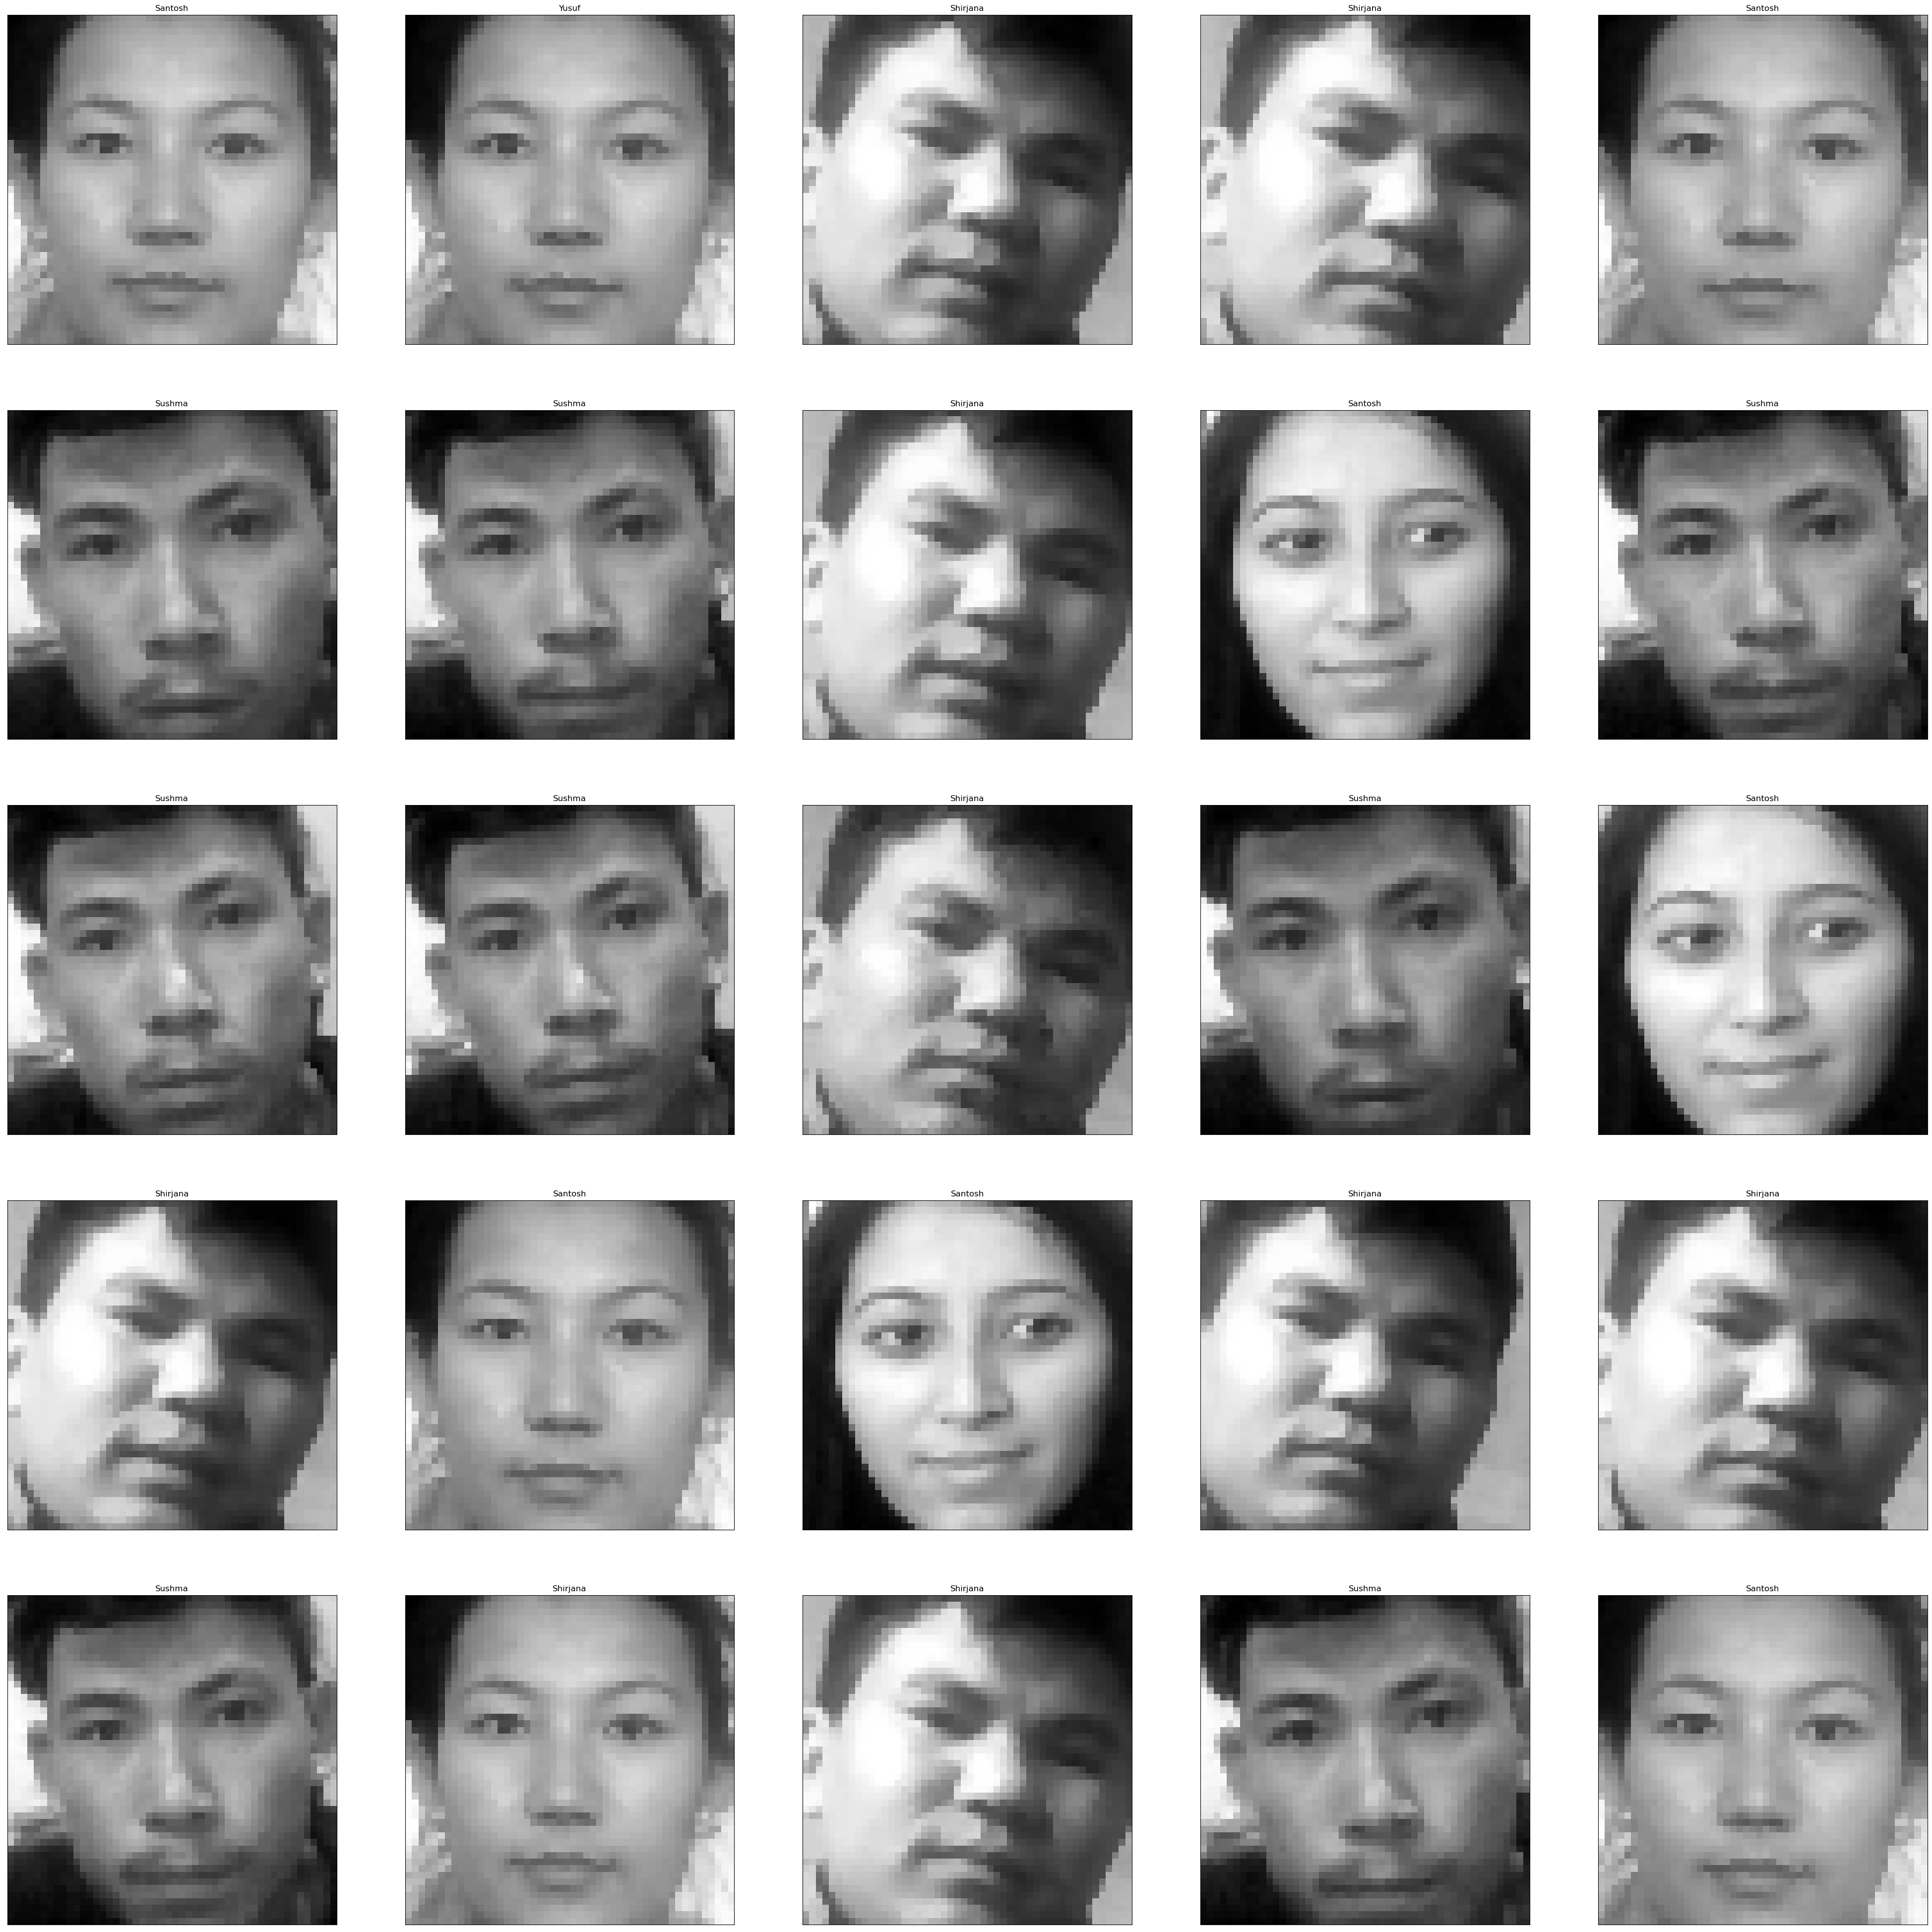

In [14]:
import matplotlib.pyplot as plt

label_dict = {0: "Sushma", 1: "Yusuf", 2: "Shirjana", 3:"Santosh"}

fig = plt.figure(figsize=(50, 50))
for num, data in enumerate(Vdata[:50]):
    img_data = data[0]
    y = fig.add_subplot(5, 5, num+1)
    image = img_data
    data = img_data.reshape(50, 50, 1)
    model_out = model.predict([data])[0]
    
    predicted_label = label_dict[np.argmax(model_out)]
    
    y.imshow(image, cmap='gray')
    plt.title(predicted_label)
    
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()
